In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols

#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

#선형모델
import statsmodels.formula.api as smf

# 평가 함수
from statsmodels.tools.eval_measures import rmse

# 정규성검정
from statsmodels.stats.stattools import omni_normtest

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
mpl.rc("font", family="NanumGothic")

In [3]:
df = pd.read_csv("data/BigData/DIABETES.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
Y              442 non-null int64
AGE            442 non-null int64
GENDER         442 non-null int64
BMI            442 non-null float64
BP             442 non-null float64
CHOLESTEROL    442 non-null int64
LDL            442 non-null float64
HDL            442 non-null float64
TCH            442 non-null float64
LTG            442 non-null float64
GLUCOSE        442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [6]:
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


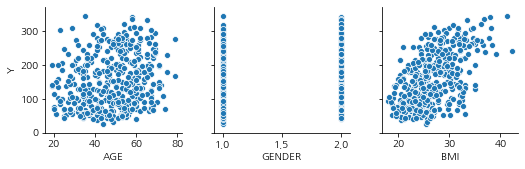

In [7]:
sns.pairplot(df, y_vars="Y", x_vars=['AGE','GENDER',"BMI"])

In [8]:
df.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


In [10]:
s=""
for c in df.columns:
    s=s+c+"+"

In [11]:
s

'Y+AGE+GENDER+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE+'

In [13]:
reg_model = smf.ols(formula="Y~AGE+GENDER+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE"
                   ,data=df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.83e-62
Time:                        17:23:30   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.5671     67.455     -4.960      

In [15]:
df_x = df.drop('Y',axis=1)

df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['varibale']= df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,varibale,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


### CHOLESTEROL, LDL 제거 결졍

In [16]:
reg_model = smf.ols(formula="Y~AGE+GENDER+BMI+BP+HDL+TCH+LTG+GLUCOSE"
                   ,data=df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     56.57
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.26e-62
Time:                        17:26:04   Log-Likelihood:                -2389.1
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     433   BIC:                             4833.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -219.0292     37.539     -5.835      0.0

In [17]:
df_x = df.drop(['Y','CHOLESTEROL', 'LDL'],axis=1)

df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['varibale']= df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,varibale,VIF
1,AGE,1.208
2,GENDER,1.275
4,BP,1.454
8,GLUCOSE,1.484
3,BMI,1.487
7,LTG,1.976
5,HDL,2.430
6,TCH,3.155
0,const,210.441


### 후진제거법을 이용한 변수 선택

In [29]:
df_y=df['Y']

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=6).fit(df_x,df_y)

selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("Selected Varibles : {}".format(selected_cols))
print("Removed Varibles : {}".format(removed_cols))

Selected Varibles : Index(['GENDER', 'BMI', 'BP', 'HDL', 'TCH', 'LTG'], dtype='object')
Removed Varibles : Index(['AGE', 'GLUCOSE'], dtype='object')


In [30]:
rfe_reg_model = smf.ols(formula="Y~GENDER+BMI+BP+HDL+TCH+LTG"
                   ,data=df)

rfe_reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     56.57
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.26e-62
Time:                        17:42:22   Log-Likelihood:                -2389.1
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     433   BIC:                             4833.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -219.0292     37.539     -5.835      0.0

In [24]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['varibale']= df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values,i) for i in range(df_x_rfe_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,varibale,VIF
1,AGE,1.208
2,GENDER,1.275
4,BP,1.454
8,GLUCOSE,1.484
3,BMI,1.487
7,LTG,1.976
5,HDL,2.430
6,TCH,3.155
0,const,210.441


In [33]:
scaler = StandardScaler()

cols = df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled =pd.DataFrame(np_scaled, columns=cols)

df_scaled['Y'] = df['Y']
reg_model_scaled = smf.ols(formula="Y~GENDER+BMI+BP+HDL+TCH+LTG"
                   ,data=df)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     75.41
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.80e-64
Time:                        17:48:00   Log-Likelihood:                -2389.6
No. Observations:                 442   AIC:                             4793.
Df Residuals:                     435   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -210.1953     36.486     -5.761      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


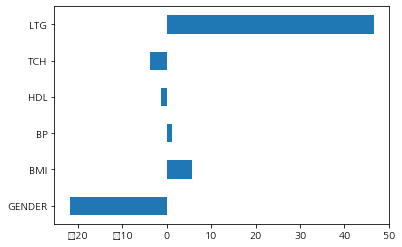

In [34]:
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_scaled_coef.plot.barh(y="Coef", legend=False)
plt.show()